In [477]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [478]:
setOne = pd.read_csv("2015.csv")
setTwo = pd.read_csv("2016.csv")
setThree = pd.read_csv("2017.csv")
setFour = pd.read_csv("2018.csv")
setFive = pd.read_csv("2019.csv")

income = pd.read_csv("income_per_person.csv")
lifeExpectency = pd.read_csv("life_expectancy_years.csv")
population = pd.read_csv("population_total.csv")

## Melting country stats dataframes and Merging

In [479]:
population = population[['country', '2015', '2016', '2017', '2018', '2019']]
population = population.melt(var_name = 'Year', value_name = 'Population', id_vars=['country'])

lifeExpectency = lifeExpectency[['country', '2015', '2016', '2017', '2018', '2019']]
lifeExpectency = lifeExpectency.melt(var_name = 'Year', value_name = 'Life Expectancy', id_vars=['country'])

income = income[['country', '2015', '2016', '2017', '2018', '2019']]
income = income.melt(var_name = 'Year', value_name = 'GDP', id_vars=['country'])


In [480]:
stats = lifeExpectency.merge(income, on = ['country', 'Year'])
stats = stats.merge(population, on = ['country', 'Year'])
stats = stats.rename({'country':'Country'}, axis=1)
stats['Year'] =stats['Year'].astype(int)
stats.head()

,Country,Year,Life Expectancy,GDP,Population
0,Afghanistan,2015,61.2,1770,34400000
1,Albania,2015,78.0,11000,2890000
2,Algeria,2015,77.1,13800,39700000
3,Andorra,2015,82.6,46600,78000
4,Angola,2015,63.3,6650,27900000


## Add year into happiness report dataframe

In [481]:
setOne["Year"] = 2015
setTwo["Year"] = 2016
setThree["Year"] = 2017
setFour["Year"] = 2018
setFive["Year"] = 2019

In [482]:
#we want life Expectancy, freedom, generosity, GDP, perception of corruption, score

In [483]:
a = list(setOne.columns)
b = list(setTwo.columns)
c = list(setThree.columns)
d = list(setFour.columns)
e = list(setFive.columns)

totalSet = pd.DataFrame()
allColumns = [a,b,c,d,e]

for x in allColumns:
    for col in range(len(x)):
        if "GDP" in x[col].upper():
            x[col] = "GDP"    
        if "freedom" in x[col].lower():
            x[col] = "Freedom"
        if "life" in x[col].lower():
            x[col] = "Life Expectancy"
        if "score" in x[col].lower():
            x[col] = "Score"
        if "generosity" in x[col].lower():
            x[col] = "Generosity"
        if "corruption" in x[col].lower():
            x[col] = "Corruption"
        if "country" in x[col].lower():
            x[col] = "Country"
        
            
allSet = [setOne, setTwo, setThree, setFour, setFive]

for x in range(len(allSet)):
    allSet[x].columns = allColumns[x]
    allSet[x] = allSet[x][[ "Year", "Country","GDP", "Life Expectancy", "Freedom","Generosity","Corruption", "Score"]]
    totalSet = pd.concat([totalSet, allSet[x]], axis = 0)

totalSet.head()

,Year,Country,GDP,Life Expectancy,Freedom,Generosity,Corruption,Score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427


In [484]:
#merge data for prediction
predictionSet = totalSet[["Year", "Country", 'Score', "Freedom", "Generosity", "Corruption"]].merge(stats, how="left", on = ["Year", "Country"])


In [485]:
## Testing and Dropping NaN values
predictionSet.isnull().sum().sum()

196

In [486]:
predictionSet = predictionSet.dropna()
predictionSet.head()

,Year,Country,Score,Freedom,Generosity,Corruption,Life Expectancy,GDP,Population
0,2015,Switzerland,7.587,0.66557,0.29678,0.41978,83.5,57300.0,8300000.0
1,2015,Iceland,7.561,0.62877,0.43630,0.14145,82.7,44200.0,330000.0
2,2015,Denmark,7.527,0.64938,0.34139,0.48357,80.9,45800.0,5690000.0
3,2015,Norway,7.522,0.66973,0.34699,0.36503,82.3,64000.0,5200000.0
4,2015,Canada,7.427,0.63297,0.45811,0.32957,81.7,43100.0,36000000.0


In [487]:
X_train, X_test, y_train, y_test = train_test_split(predictionSet.drop(columns = ["Score"]), predictionSet["Score"], test_size=0.4)

## EDA

### GDP vs Score

<AxesSubplot:xlabel='GDP', ylabel='Score'>

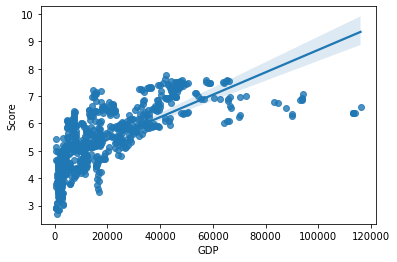

In [488]:
sns.regplot(x='GDP', y="Score", data=predictionSet)

(array([159.,  65.,  61.,  57.,  47.,  60.,  22.,  23.,  29.,  20.,  15.,
         23.,  18.,  16.,  13.,  24.,  16.,   4.,   3.,   5.,   3.,   2.,
         11.,   1.,   4.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   5.,
          0.,   0.,   0.,   0.,   0.,   3.,   2.]),
 array([   625.   ,   3509.375,   6393.75 ,   9278.125,  12162.5  ,
         15046.875,  17931.25 ,  20815.625,  23700.   ,  26584.375,
         29468.75 ,  32353.125,  35237.5  ,  38121.875,  41006.25 ,
         43890.625,  46775.   ,  49659.375,  52543.75 ,  55428.125,
         58312.5  ,  61196.875,  64081.25 ,  66965.625,  69850.   ,
         72734.375,  75618.75 ,  78503.125,  81387.5  ,  84271.875,
         87156.25 ,  90040.625,  92925.   ,  95809.375,  98693.75 ,
        101578.125, 104462.5  , 107346.875, 110231.25 , 113115.625,
        116000.   ]),
 <BarContainer object of 40 artists>)

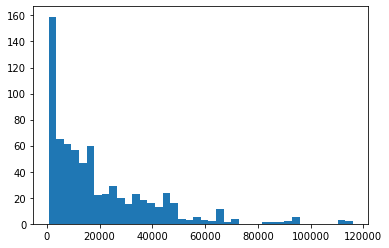

In [489]:
plt.hist(predictionSet["GDP"], bins=40)

### Life Expectancy vs Score

<AxesSubplot:xlabel='Life Expectancy', ylabel='Score'>

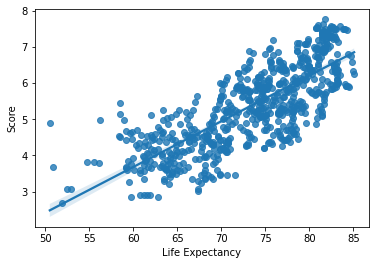

In [490]:
sns.regplot(x='Life Expectancy', y="Score", data=predictionSet)

(array([ 2.,  1.,  2.,  0.,  1.,  1.,  2.,  0.,  0.,  5., 13.,  8., 17.,
        13., 15., 20., 18., 10., 18., 12., 23., 22., 27., 27., 16., 20.,
        29., 36., 40., 24., 44., 29., 31., 30., 17., 49., 43., 35.,  8.,
         8.]),
 array([50.5  , 51.365, 52.23 , 53.095, 53.96 , 54.825, 55.69 , 56.555,
        57.42 , 58.285, 59.15 , 60.015, 60.88 , 61.745, 62.61 , 63.475,
        64.34 , 65.205, 66.07 , 66.935, 67.8  , 68.665, 69.53 , 70.395,
        71.26 , 72.125, 72.99 , 73.855, 74.72 , 75.585, 76.45 , 77.315,
        78.18 , 79.045, 79.91 , 80.775, 81.64 , 82.505, 83.37 , 84.235,
        85.1  ]),
 <BarContainer object of 40 artists>)

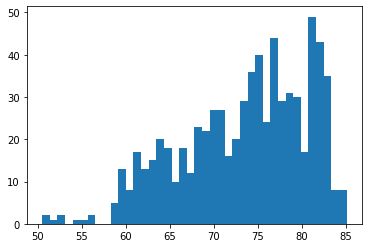

In [491]:
plt.hist(predictionSet['Life Expectancy'], bins=40)

### Population vs Score

<AxesSubplot:xlabel='Population', ylabel='Score'>

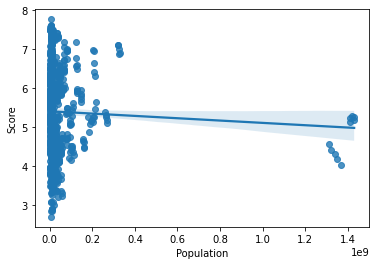

In [492]:
sns.regplot(x='Population', y="Score", data=predictionSet)

(array([530.,  96.,  32.,  13.,  10.,  14.,   1.,   5.,   1.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   2.,   1.,   5.]),
 array([3.30000000e+05, 3.60717500e+07, 7.18135000e+07, 1.07555250e+08,
        1.43297000e+08, 1.79038750e+08, 2.14780500e+08, 2.50522250e+08,
        2.86264000e+08, 3.22005750e+08, 3.57747500e+08, 3.93489250e+08,
        4.29231000e+08, 4.64972750e+08, 5.00714500e+08, 5.36456250e+08,
        5.72198000e+08, 6.07939750e+08, 6.43681500e+08, 6.79423250e+08,
        7.15165000e+08, 7.50906750e+08, 7.86648500e+08, 8.22390250e+08,
        8.58132000e+08, 8.93873750e+08, 9.29615500e+08, 9.65357250e+08,
        1.00109900e+09, 1.03684075e+09, 1.07258250e+09, 1.10832425e+09,
        1.14406600e+09, 1.17980775e+09, 1.21554950e+09, 1.25129125e+09,
        1.28703300e+09, 1.32277475e+09, 1.35851650e+09, 1.39425825e+09,
      

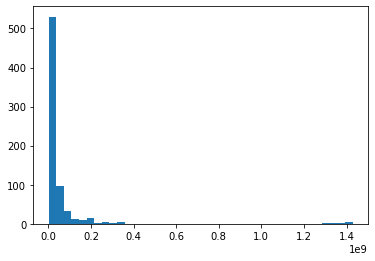

In [493]:
plt.hist(predictionSet["Population"], bins=40)

### Freedom vs Score

<AxesSubplot:xlabel='Freedom', ylabel='Score'>

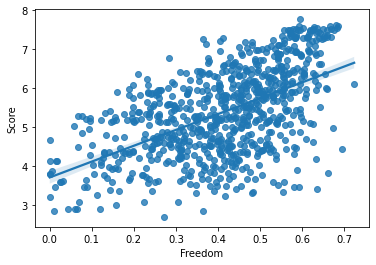

In [494]:
sns.regplot(x='Freedom', y="Score", data=totalSet)

### Generosity vs Score

<AxesSubplot:xlabel='Generosity', ylabel='Score'>

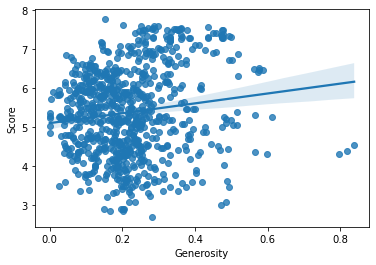

In [495]:
sns.regplot(x='Generosity', y="Score", data=totalSet)

(array([ 8., 16., 28., 42., 36., 55., 46., 48., 75., 59., 56., 56., 54.,
        33., 21., 34., 17., 19., 14., 11.,  7.,  5., 14., 11.,  5.,  0.,
         2.,  4.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         2.]),
 array([0.        , 0.02095188, 0.04190376, 0.06285564, 0.08380752,
        0.1047594 , 0.12571127, 0.14666315, 0.16761503, 0.18856691,
        0.20951879, 0.23047067, 0.25142255, 0.27237443, 0.29332631,
        0.31427819, 0.33523006, 0.35618194, 0.37713382, 0.3980857 ,
        0.41903758, 0.43998946, 0.46094134, 0.48189322, 0.5028451 ,
        0.52379698, 0.54474885, 0.56570073, 0.58665261, 0.60760449,
        0.62855637, 0.64950825, 0.67046013, 0.69141201, 0.71236389,
        0.73331577, 0.75426764, 0.77521952, 0.7961714 , 0.81712328,
        0.83807516]),
 <BarContainer object of 40 artists>)

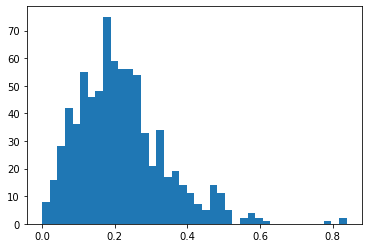

In [496]:
plt.hist(totalSet["Generosity"], bins=40)

In [497]:
ct = ColumnTransformer(
    [("ss", StandardScaler(), ["Life Expectancy", "GDP", "Freedom"]),
     ("ohe", OneHotEncoder(drop="first"), ["Year"])
    ], remainder = "drop")

pl = Pipeline([("ct", ct), ("lr", LinearRegression())])
pl.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  ['Life Expectancy', 'GDP',
                                                   'Freedom']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Year'])])),
                ('lr', LinearRegression())])

In [499]:
pred = pl.predict(X_test)

In [500]:
np.mean((y_test-pred)**2)

0.35103908009791723

In [501]:
np.mean((y_test-pred)**2)**(1/2)

0.5924855104539833

<AxesSubplot:ylabel='Density'>

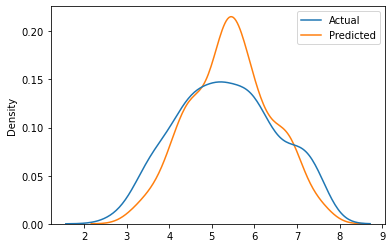

In [502]:
cal = pd.DataFrame()
cal["Actual"] = y_test
cal["Predicted"] = pred
sns.kdeplot(data=cal)

In [503]:
X_train

,Year,Country,Freedom,Generosity,Corruption,Life Expectancy,GDP,Population
778,2019,Tanzania,0.417000,0.276000,0.147000,67.7,2980.0,58000000.0
447,2017,Uganda,0.443186,0.325766,0.057070,65.7,1770.0,41200000.0
639,2019,Luxembourg,0.526000,0.194000,0.316000,82.0,94300.0,616000.0
349,2017,Qatar,0.604131,0.330474,0.439299,80.2,113000.0,2720000.0
381,2017,Belarus,0.295400,0.155138,0.156314,74.0,17200.0,9450000.0
...,...,...,...,...,...,...,...,...
203,2016,El Salvador,0.372690,0.088770,0.106130,73.8,7120.0,6360000.0
514,2018,Kuwait,0.554000,0.167000,0.106000,83.2,65500.0,4140000.0
473,2018,Iceland,0.677000,0.353000,0.138000,82.9,48600.0,337000.0
590,2018,Burkina Faso,0.312000,0.175000,0.128000,62.1,1760.0,19800000.0
